In [1]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Module to see files and folders in directories
from scipy import stats
import pandas as pd
from sympy import *
import os

sys.path.append('../../External_Functions')
from ExternalFunctions import UnbinnedLH, BinnedLH, Chi2Regression
from ExternalFunctions import nice_string_output, add_text_to_ax, add_header_to_ax

In [98]:
path = "../../Project/BallOnIncline/Ball_measurements/"
listdir = os.listdir(path)
bigballdf = pd.read_csv(path + listdir[0], names = ["Time (s)"], skiprows = 15, usecols=[0])
smallballdf = pd.read_csv(path + listdir[10], names = ["Time (s)"], skiprows = 15, usecols=[0])

for file in listdir:
    if "Bigball" in file:
        name = file.replace(".csv", "")
        bigballdf[name.replace("Bigball", "") + " V"] = pd.read_csv(path + file, skiprows=14, usecols=[1])
    if "Smallball" in file:
        name = file.replace(".csv", "")
        smallballdf[name.replace("Smallball", "") + " V"] = pd.read_csv(path + file, skiprows=14, usecols=[1])
        
display(bigballdf)

,Time (s),1 V,1_turned V,2 V,2_turned V,3 V,3_turned V,4 V,4_turned V,5 V,5_turned V
0,-0.5000,0.789345,0.78968,0.789680,0.789680,0.789680,0.789680,0.78968,0.78968,0.790014,0.789345
1,-0.4998,0.789345,0.78968,0.789680,0.789680,0.789345,0.789680,0.78968,0.78968,0.790014,0.789680
2,-0.4996,0.789345,0.78968,0.789680,0.789680,0.789345,0.789680,0.78968,0.78968,0.790014,0.789680
3,-0.4994,0.789345,0.78968,0.789680,0.789680,0.789345,0.789345,0.78968,0.78968,0.790014,0.789680
4,-0.4992,0.789345,0.78968,0.789680,0.789680,0.789345,0.789345,0.78968,0.78968,0.790014,0.789345
...,...,...,...,...,...,...,...,...,...,...,...
24995,4.4990,0.789345,0.78968,0.789345,0.789680,0.789345,0.790014,0.78968,0.78968,0.790014,0.789680
24996,4.4992,0.789345,0.78968,0.789680,0.789345,0.789680,0.789680,0.78968,0.78968,0.789680,0.789680
24997,4.4994,0.789345,0.78968,0.789680,0.789345,0.789345,0.790014,0.78968,0.78968,0.789680,0.789680
24998,4.4996,0.789345,0.78968,0.789680,0.789680,0.789345,0.790014,0.78968,0.78968,0.789680,0.789680


,1 V,1_turned V,2 V,2_turned V,3 V,3_turned V,4 V,4_turned V,5 V,5_turned V,Time (s)
0,0.789345,0.790014,0.790014,0.789345,0.789345,0.78968,0.789680,0.789680,0.789345,0.789680,-0.5000
1,0.789680,0.790014,0.790014,0.789345,0.789345,0.78968,0.789345,0.789680,0.789345,0.789680,-0.4998
2,0.789680,0.790014,0.790014,0.789680,0.789345,0.78968,0.789680,0.789680,0.789345,0.790014,-0.4996
3,0.789680,0.790014,0.790014,0.789680,0.789345,0.78968,0.789680,0.789680,0.789345,0.790014,-0.4994
4,0.789680,0.790014,0.790014,0.789680,0.789345,0.78968,0.789345,0.789680,0.789345,0.790014,-0.4992
...,...,...,...,...,...,...,...,...,...,...,...
24995,0.789680,0.790014,0.789680,0.789680,0.789680,0.78968,0.789680,0.789680,0.789680,0.789345,4.4990
24996,0.789345,0.790014,0.790014,0.790014,0.790014,0.78968,0.789680,0.789680,0.789680,0.789345,4.4992
24997,0.789680,0.790014,0.790014,0.790014,0.790014,0.78968,0.789680,0.789345,0.789680,0.789680,4.4994
24998,0.789680,0.790014,0.790014,0.790014,0.789680,0.78968,0.789680,0.789680,0.789680,0.789680,4.4996


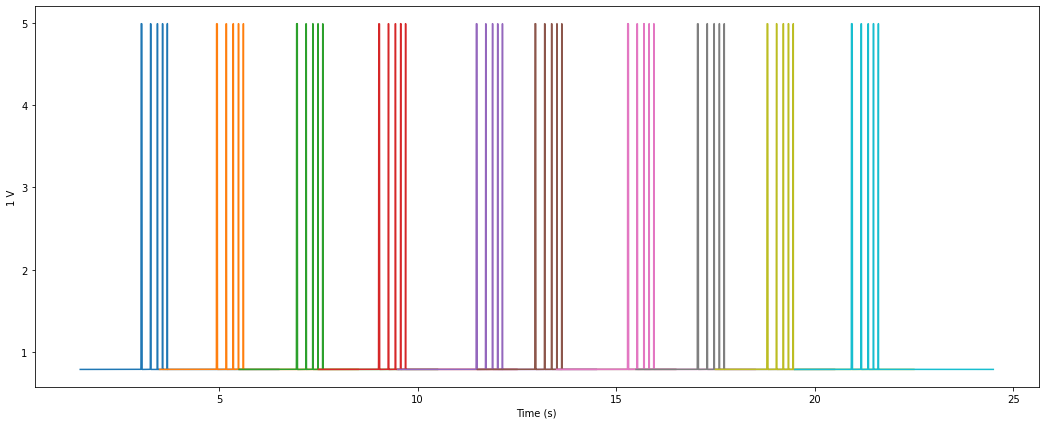

In [51]:
fig, ax = plt.subplots(figsize = (18,7), facecolor = "white")

tempdf = bigballdf.copy()

for col in tempdf.keys()[1:]:
    tempdf["Time (s)"] += 2
    sns.lineplot(x = "Time (s)", y = col, data = tempdf, ax = ax)
plt.show() 

In [139]:
bigballpeaks = np.zeros((5, len(bigballdf.keys()[1:])))
bigballpeakerrors = np.zeros((5, len(bigballdf.keys()[1:])))

smallballpeaks = np.zeros((5, len(smallballdf.keys()[1:])))
smallballpeakerrors = np.zeros((5, len(smallballdf.keys()[1:])))

for dataframe, peakmatrix, errormatrix in zip([smallballdf, bigballdf], [smallballpeaks, bigballpeaks], [smallballpeakerrors, bigballpeakerrors]):
    for cidx, col in enumerate(dataframe.keys()[1:]):
        hm = (max(dataframe[col]) - min(dataframe[col])) / 2
        mask = dataframe[col] > hm
        
        time = dataframe["Time (s)"][mask].to_numpy()
        
        split = (time[1:] - time[:-1]) > 0.001
        splitidex = np.where(split)[0] + 1
        
        time = np.split(time, splitidex)
        for tidx, t in enumerate(time):
            mean = np.mean(t)
            std = np.std(t, ddof =1)
            sigmamean = std / np.sqrt(len(t))
            peakmatrix[tidx, cidx] = mean
            errormatrix[tidx, cidx] = sigmamean
            
indexlist = ["peak 1", "peak 2", "peak 3", "peak 4", "peak 5"]   
peakdf_bigball = pd.DataFrame(data = bigballpeaks, columns = bigballdf.keys()[1:], index=indexlist, dtype=float)
errordf_bigball = pd.DataFrame(data = bigballpeakerrors, columns = bigballdf.keys()[1:], index=indexlist, dtype=float)
peakdf_smallball = pd.DataFrame(data = smallballpeaks, columns = smallballdf.keys()[1:], index=indexlist, dtype=float)
errordf_smallball = pd.DataFrame(data = bigballpeakerrors, columns = smallballdf.keys()[1:], index=indexlist, dtype=float)
display(peakdf_bigball)
display(peakdf_smallball)

,1 V,1_turned V,2 V,2_turned V,3 V,3_turned V,4 V,4_turned V,5 V,5_turned V
peak 1,1.0428,0.9426,0.9579,1.0270,1.4848,0.9633,1.2982,1.0562,0.8079,0.9355
peak 2,1.2731,1.1784,1.1888,1.2632,1.7150,1.1994,1.5286,1.2913,1.0388,1.1721
peak 3,1.4437,1.3532,1.3596,1.4384,1.8856,1.3745,1.6994,1.4660,1.2096,1.3473
peak 4,1.5734,1.4862,1.4893,1.5714,2.0150,1.5074,1.8290,1.5986,1.3392,1.4803
peak 5,1.6930,1.6087,1.6088,1.6941,2.1344,1.6299,1.9485,1.7211,1.4587,1.6029


,1 V,1_turned V,2 V,2_turned V,3 V,3_turned V,4 V,4_turned V,5 V,5_turned V
peak 1,0.8281,0.7998,0.7770,0.9613,0.7806,1.0254,0.8985,1.0975,0.9348,0.9539
peak 2,1.0635,1.0417,1.0119,1.2019,1.0150,1.2655,1.1350,1.3387,1.1695,1.1948
peak 3,1.2379,1.2207,1.1862,1.3807,1.1892,1.4439,1.3100,1.5175,1.3437,1.3736
peak 4,1.3705,1.3563,1.3185,1.5166,1.3217,1.5796,1.4430,1.6533,1.4762,1.5091
peak 5,1.4918,1.4818,1.4406,1.6419,1.4424,1.7049,1.5654,1.7786,1.5982,1.6342


In [275]:
tableparams = pd.read_table("../../Project/BallOnIncline/Ballparameters.csv", delimiter=';', decimal=',', skiprows=1)
rails = tableparams.filter(regex = " rail")
rails = rails.drop(["Width rail (mm)", "width rail error (mm)"], axis = 1)
railmask = np.arange(0, len(rails.keys()), 2)
errormask = np.arange(1, len(rails.keys()), 2)
raildf = rails.iloc[:, railmask]
railerrordf = rails.iloc[:, errormask]
display(raildf)
display(railerrordf)

,Length1 rail (cm),Length2 rail (cm),Length3 rail (cm),Length4 rail (cm),Length5 rail (cm),Length1 rail mes2 (cm),Length2 rail mes2 (cm),Length3 rail mes2 (cm),Length4 rail mes2 (cm),Length5 rail mes2 (cm)
0,20.55,37.10,54.75,71.20,88.80,20.55,37.15,54.75,71.20,88.90
1,20.55,37.15,54.75,71.25,88.85,20.56,37.14,54.75,71.23,88.85
2,20.57,37.13,54.76,71.22,88.81,20.50,37.15,54.75,71.20,88.85


,Length1 rail error (cm),Length2 rail error (cm),Length3 rail error (cm),Length4 rail error (cm),Length5 rail error (cm),Length1 rail error mes2 (cm),Length2 rail error mes2 (cm),Length3 rail error mes2 (cm),Length4 rail error mes2 (cm),Length5 rail error mes2 (cm)
0,0.05,0.02,0.01,0.05,0.02,0.03,0.05,0.05,0.05,0.05
1,0.06,0.05,0.05,0.04,0.04,0.02,0.03,0.02,0.03,0.03
2,0.05,0.05,0.02,0.02,0.02,0.50,0.01,0.02,0.01,0.02


In [294]:
def weighted_mean(data, error):
    data, error = np.array(data), np.array(error)
    return np.sum((data / error**2)/np.sum(1 / error**2))

def weighted_error_on_mean(error):
    error = np.array(error)
    return np.sqrt(1 / np.sum(1 / error**2))

def Chi2(data, error, fval):
    return np.sum(((data - fval) / error)**2)

def Chi2_vals(data, error, fval):
    return ((data - fval) / error)**2

#check if the data could come from the same setup (No change in setup).
#calculate weighted mean for mesurement 1
#calculate chi2 for both sets of data
railkeys = raildf.columns
sigmakeys = railerrordf.columns
hl = int(len(sigmakeys)/2)
chi2_me11 = 0
chi2_me21 = 0
chi2_me12 = 0
chi2_me22 = 0
for idx, (sigmacol, col) in enumerate(zip(sigmakeys[:hl], railkeys[:hl])):
    wm1 = weighted_mean(raildf[col], railerrordf[sigmacol])
    wm2 = weighted_mean(raildf.iloc[:, idx + hl], railerrordf.iloc[:, idx + hl])
    chi2_me11 += Chi2(raildf[col], railerrordf[sigmacol], wm1)
    chi2_me21 += Chi2(raildf.iloc[:, idx + hl], railerrordf.iloc[:, idx + hl], wm1)
    chi2_me12 += Chi2(raildf[col], railerrordf[sigmacol], wm2)
    chi2_me22 += Chi2(raildf.iloc[:, idx + hl], railerrordf.iloc[:, idx + hl], wm2)
    
Ndof = (hl - 1)
prob_me11 = stats.chi2.sf(chi2_me11, Ndof)
prob_me21 = stats.chi2.sf(chi2_me21, Ndof)
prob_me12 = stats.chi2.sf(chi2_me12, Ndof)
prob_me22 = stats.chi2.sf(chi2_me22, Ndof)
print(prob_me11)
print(prob_me21)
print(prob_me12)
print(prob_me22)
# Chi2 shows that the second round of measurement diverge to much from the first to be considered from the same setup. 
# Therefore, the data cannot be combined before calculating the mean and std. 
# This could be a result of low statistics or a result of a real change in the position of the detectors which accored doing the measurements. 
# If it is a shift in the position the best is to calculate the means and sigmas before, and combine them for the final result. 
# As it is not know at which point doing the experiment the shift occured they are just combined naively

# Each dataset is consistant with itself, but not with eachother.

0.5102670846848363
1.427730810010556e-06
0.0002809020522986526
0.736861103601523


In [317]:
part1 = raildf.iloc[:, np.arange(0, hl)]
part2 = raildf.iloc[:, np.arange(hl, 2*hl)]
part2.columns = part1.columns
combinedf = pd.concat([part1, part2], ignore_index = True)

distances = np.zeros(hl)
errors_on_distances = np.zeros(hl)

for idx, (name, value) in enumerate(combinedf.iteritems()):
    value = value.values
    distances[idx] = np.mean(value)
    print(np.std(value))
    errors_on_distances[idx] = np.std(value)#/np.sqrt(len(combinedf.columns))
    
print(distances, errors_on_distances)

0.02211083193570264
0.01795054935711386
0.0037267799624989073
0.018856180831640444
0.03248931448269786
[20.54666667 37.13666667 54.75166667 71.21666667 88.84333333] [0.02211083 0.01795055 0.00372678 0.01885618 0.03248931]


In [359]:
railkeys = raildf.columns
sigmakeys = railerrordf.columns
hl = int(len(sigmakeys)/2)

distances = np.zeros(hl)
errors_on_distances = np.zeros(hl)

# raildf[col], railerrordf[sigmacol]

for idx, (sigmacol, col) in enumerate(zip(sigmakeys[:hl], railkeys[:hl])):
    wm1 = weighted_mean(raildf[col], railerrordf[sigmacol])
    wm2 = weighted_mean(raildf.iloc[:, idx + hl], railerrordf.iloc[:, idx + hl])
    sigma1 = weighted_error_on_mean(railerrordf[sigmacol])
    sigma2 = weighted_error_on_mean(railerrordf.iloc[:, idx + hl])
    # print(sigma1, sigma2, weighted_error_on_mean([sigma1, sigma2]))
    # print(np.sqrt((sigma1/2)**2 + (sigma2/2)**2))
    # print(np.std([wm1, wm2], ddof=1))
    distances[idx] = wm1
    errors_on_distances[idx] = sigma1
    
print(distances)
print(errors_on_distances)

[20.55742268 37.10969697 54.75193798 71.22304965 88.81      ]
[0.03046038 0.01740777 0.00880451 0.01684304 0.01333333]


In [323]:
def polysecond(x, a, b, c):
    return 1/2 * a * x**2 + b * x + c

def Chi2_vals(data, error, fval):
    return ((data - fval) / error)**2


'''
array_a_big
array_b_big
array_c_big
array_a_big_err
array_b_big_err
array_c_big_err
array_chi2_big
array_prob_big
this is setup in a matrix for each data set
'''
paramatrix_big = np.zeros((8, 5))
paramatrix_big_t = np.zeros((8, 5))
paramatrix_small = np.zeros((8, 5))
paramatrix_small_t = np.zeros((8, 5))
for df, para, para_t in zip([peakdf_bigball, peakdf_smallball], [paramatrix_big, paramatrix_small], [paramatrix_big_t, paramatrix_small_t]):
    for idx, (name, peaks) in enumerate(df.items()):
        y = distances
        ey = errors_on_distances
        x = peaks.values
        chi2_object = Chi2Regression(polysecond, x, y, ey)
        chi2_object.errordef = 1.0    # Chi2 definition (for Minuit)

        # Here we let Minuit know, what to minimise, how, and with what starting parameters:   
        minuit = Minuit(chi2_object, a=156, b=0.0, c=30)     # External Functions
        # minuit = Minuit(chi2_owncalc, a=8.5.0, b=0.0)     # Own alternative

        # Perform the actual fit:
        minuit.migrad()

        # Extract the fitting parameters and their errors:
        a_fit = minuit.values['a']
        b_fit = minuit.values['b']
        c_fit = minuit.values['c']
        sigma_a_fit = minuit.errors['a']
        sigma_b_fit = minuit.errors['b']
        sigma_c_fit = minuit.errors['c']
        
        Nvar = 3                   # Number of variables (alpha0 and alpha1)
        Ndof_fit = len(x) - Nvar   # Number of degrees of freedom = Number of data points - Number of variables

        # Get the minimal value obtained for the quantity to be minimised (here the Chi2)
        Chi2_fit = minuit.fval                          # The chi2 value
        Prob_fit = stats.chi2.sf(Chi2_fit, Ndof_fit)    # The chi2 probability given N degrees of freedom
        # assign to matrix
        if "turned" not in name:
            para[:, round(idx/2)] = [a_fit, b_fit, c_fit, sigma_a_fit, sigma_b_fit, sigma_c_fit, Chi2_fit, Prob_fit]
        else:
            para_t[:, int(np.floor(idx/2))] = [a_fit, b_fit, c_fit, sigma_a_fit, sigma_b_fit, sigma_c_fit, Chi2_fit, Prob_fit]
        # print(Chi2_vals(y, ey, polysecond(x, a_fit, b_fit, c_fit)))
        print(name, Prob_fit)
        
# print(paramatrix_big)

1 V 0.3991372015816609
1_turned V 0.16139343056173325
2 V 0.20632943980600937
2_turned V 0.2679511102653996
3 V 0.24194133225914827
3_turned V 0.12296322272146479
4 V 0.16105650008037165
4_turned V 0.3736903387083544
5 V 0.2810826583815368
5_turned V 0.21594539636048288
1 V 1.3287851196969239e-06
1_turned V 0.4663394075153695
2 V 0.29739729548121113
2_turned V 0.18389034981409172
3 V 5.926245734228393e-13
3_turned V 0.6265474640162738
4 V 0.08213814602035985
4_turned V 0.4105438747174698
5 V 0.08636226719539743
5_turned V 0.12222671567177615


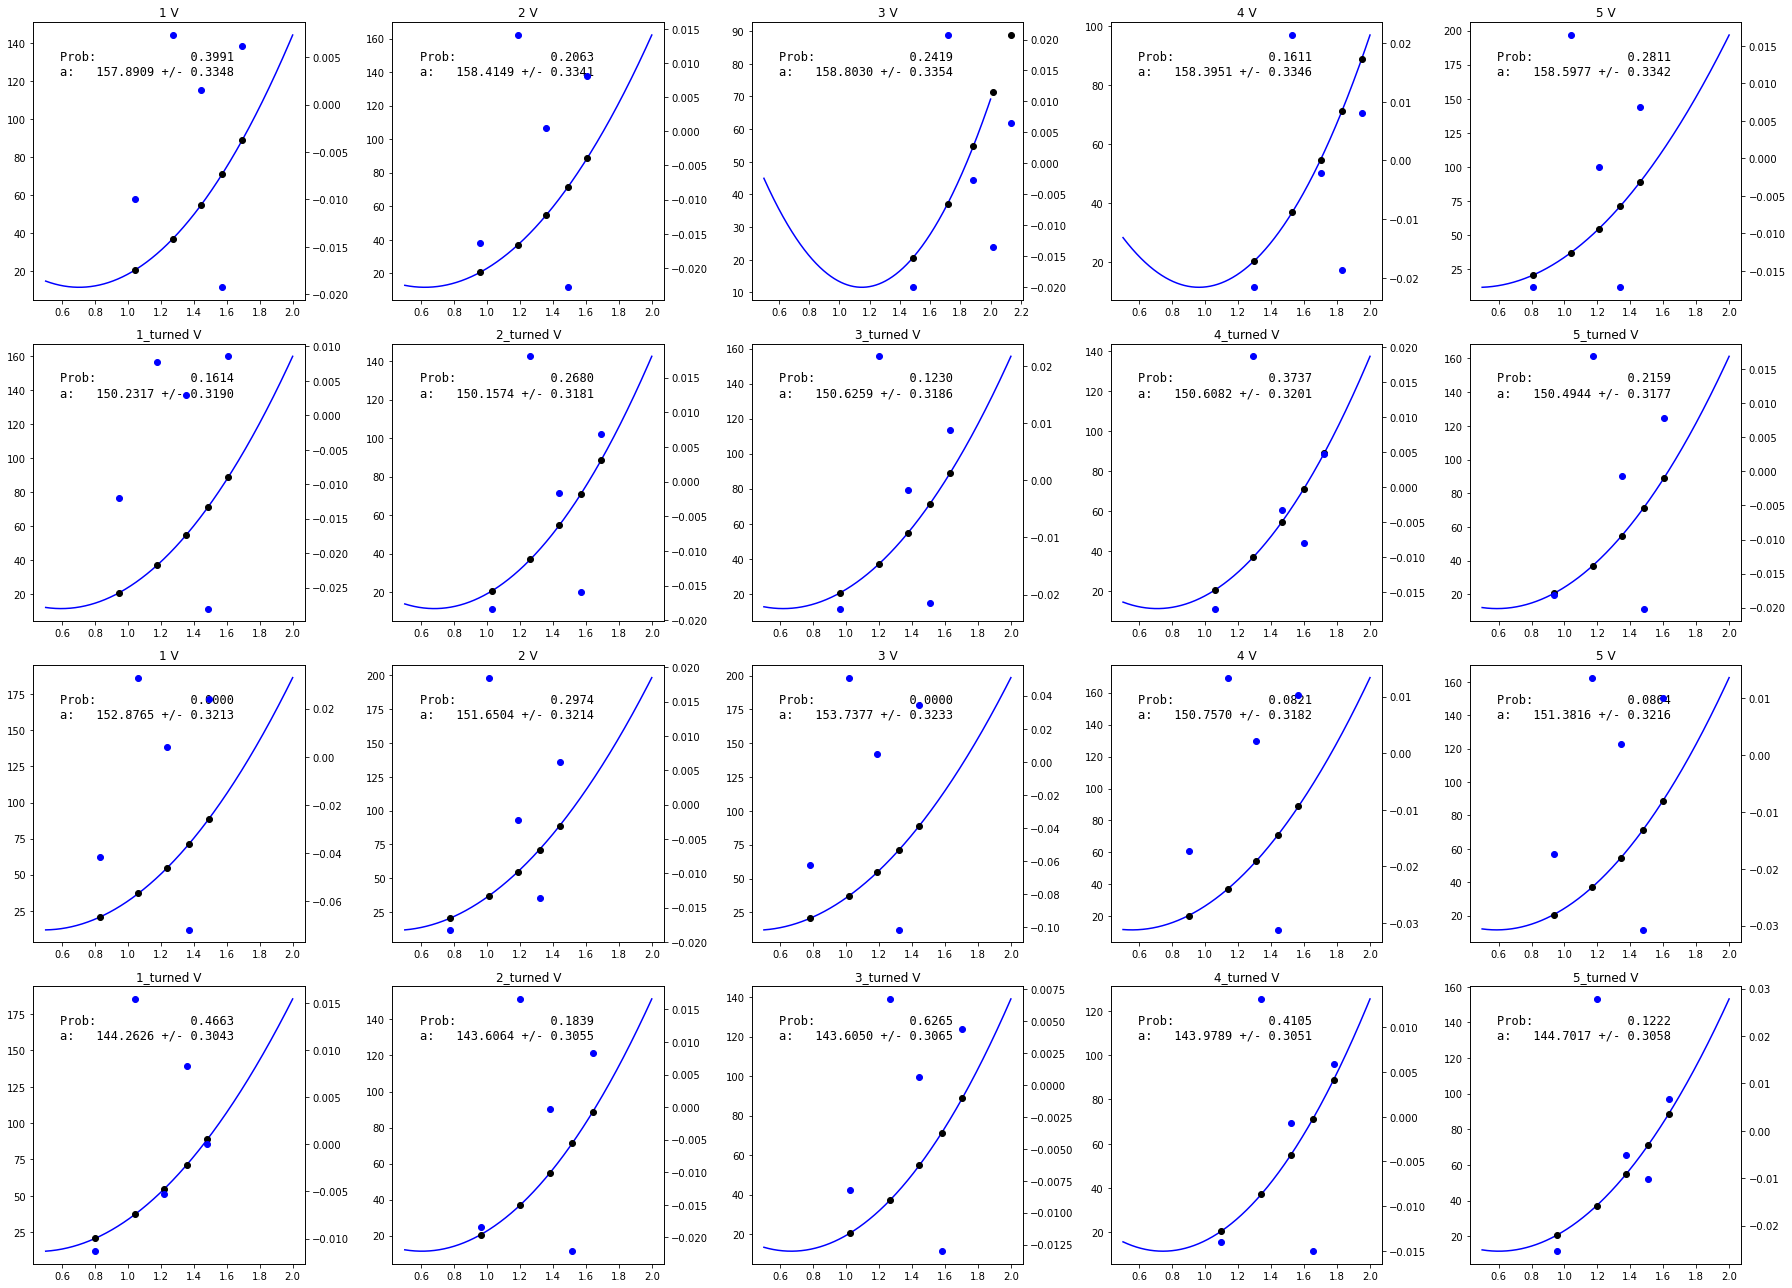

In [367]:
fig, axes = plt.subplots(4, 5, figsize = (25,18), facecolor = "white")

x_plot=np.linspace(0.5, 2, 1000)
normalmask = np.arange(0, len(peakdf_bigball.columns), 2)
turnedmask = np.arange(1, len(peakdf_bigball.columns), 2)
for data, axrow, mask, dataframe in zip([paramatrix_big, paramatrix_big_t, paramatrix_small, paramatrix_small_t], axes, [normalmask, turnedmask, normalmask, turnedmask], [peakdf_bigball, peakdf_bigball, peakdf_smallball, peakdf_smallball]):
    for col, ax, dfidx in zip(data.T, axrow, mask):
        ax.plot(x_plot, polysecond(x_plot, *col[0:3]), color = "b")
        ax.errorbar(dataframe.iloc[:, dfidx], distances, ecolor = "k", fmt = "o", color = "k", capsize = 4)
        text = nice_string_output({"Prob:": f"{col[7]:.4f}", "a:": f"{col[0]:.4f} +/- {col[3]:.4f}"}, extra_spacing=0)
        add_text_to_ax(0.1, 0.9, text, ax)
        ax.set_title(str(dataframe.columns[dfidx]))
        
        sec_ax = ax.twinx()
        sec_ax.errorbar(dataframe.iloc[:, dfidx], distances - polysecond(dataframe.iloc[:, dfidx], *col[0:3]), ecolor = "k", fmt = "o", color = "b", capsize = 4)
        
plt.tight_layout()
plt.savefig("test.png", dpi = 150)

In [373]:
a_dataframe = pd.DataFrame({"bigball": [np.nan, np.nan], "bigball_turned": [np.nan, np.nan], "smallball": [np.nan, np.nan], "smallball_turned": [np.nan, np.nan]}, index = ["Weighted mean", "Weighted mean on error"])
display(a_dataframe)
for data, name in zip([paramatrix_big, paramatrix_big_t, paramatrix_small, paramatrix_small_t], a_dataframe.columns):
    wm = weighted_mean(data[0, :], data[3, :])
    sigmam = weighted_error_on_mean(data[3, :])
    a_dataframe[name] = [wm, sigmam]
display(a_dataframe)

,bigball,bigball_turned,smallball,smallball_turned
Weighted mean,NaN,NaN,NaN,NaN
Weighted mean on error,NaN,NaN,NaN,NaN


,bigball,bigball_turned,smallball,smallball_turned
Weighted mean,158.420176,150.423172,152.071766,144.031554
Weighted mean on error,0.149651,0.142520,0.143626,0.136587


In [374]:
print(tableparams.keys())

Index(['Gonimeter front and left (degrree)',
       'Gonimeter front and left error (degree)',
       'Gonimeter back and left (degrree)',
       'Gonimeter back and left error (degree)', 'Length left (cm)',
       'length left error (cm)', 'Height (cm)', 'Height error (cm)',
       'Right angle measure (degree)', 'Right angle measure error (degree)',
       'Length1 rail (cm)', 'Length1 rail error (cm)', 'Length2 rail (cm)',
       'Length2 rail error (cm)', 'Length3 rail (cm)',
       'Length3 rail error (cm)', 'Length4 rail (cm)',
       'Length4 rail error (cm)', 'Length5 rail (cm)',
       'Length5 rail error (cm)', 'Width rail (mm)', 'width rail error (mm)',
       'Big ball diameter (mm)', 'Big ball diameter error (mm)',
       'Small ball diameter (mm)', 'Small ball diameter error (mm)',
       'Goniemeter front and right (degrees)',
       'Goniemeter front and right error (degrees)',
       'Goniemeter back and right (degrees)',
       'Goniemeter turned back and right error 

In [396]:
theta = 14.24982 * np.pi/180
sigmatheta = 0.07014 * np.pi/180
theta_t = 13.17067 * np.pi/180
sigmatheta_t = 0.07628 * np.pi/180
d_big = weighted_mean(tableparams['Big ball diameter (mm)']/1000, tableparams['Big ball diameter error (mm)']/1000)
d_big_sigma = weighted_error_on_mean(tableparams['Big ball diameter error (mm)']/1000)
d_small = weighted_mean(tableparams['Small ball diameter (mm)']/1000, tableparams['Small ball diameter error (mm)']/1000)
d_small_sigma = weighted_error_on_mean(tableparams['Small ball diameter error (mm)']/1000)
d_rail = weighted_mean(tableparams['Width rail (mm)']/1000, tableparams['width rail error (mm)']/1000)
d_rail_sigma = weighted_error_on_mean(tableparams['width rail error (mm)']/1000)

In [399]:
def error_on_g(a, sigmaa, theta, sigmatheta, d_ball, sigmad_ball, d_rail, sigmad_rail):
    asym = Symbol("a")
    thetasym = Symbol("theta")
    d_ballsym = Symbol("d_ball")
    d_railsym = Symbol("d_rail")

    g = asym / sin(thetasym) * (1 + (2/5) * (d_ballsym**2 / (d_ballsym **2 + (d_railsym)**2)))

    def variance_con(value, sigma):
        return lambdify([asym, thetasym, d_ballsym, d_railsym], g.diff(value)**2 * sigma**2, 'numpy')(a, theta, d_ball, d_rail)
    Vg_a_con = variance_con(asym, sigmaa)
    Vg_theta_con = variance_con(thetasym, sigmatheta)
    Vg_d_ball_con = variance_con(d_ballsym, sigmad_ball)
    Vg_d_rail_con = variance_con(d_railsym, sigmad_rail)
    
    sigmag = np.sqrt(Vg_a_con + Vg_theta_con + Vg_d_ball_con + Vg_d_rail_con)
    return sigmag

def calc_g(a, theta, d_ball, d_rail):
    return a / np.sin(theta) * (1 + (2/5) * (d_ball**2 / (d_ball **2 - (d_rail)**2)))

for (name, col), db, dbsigma, the, sigmathe in zip(a_dataframe.iteritems(), [d_big, d_big, d_small, d_small], [d_big_sigma, d_big_sigma, d_small_sigma, d_small_sigma], [theta, theta_t, theta, theta_t], [sigmatheta, sigmatheta_t, sigmatheta, sigmatheta_t]):
    a, sigmaa = col/100
    gvalue = calc_g(a, the, db, d_rail)
    gerror = error_on_g(a, sigmaa, the, sigmathe, db, dbsigma, d_rail, d_rail_sigma)
    print(f"for {name}: g = {gvalue:.2f} +/- {gerror:.2f}")

for bigball: g = 9.53 +/- 0.04
for bigball_turned: g = 9.77 +/- 0.05
for smallball: g = 9.40 +/- 0.04
for smallball_turned: g = 9.62 +/- 0.05
